In [9]:
# import libaries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# loaded datasets 
df = pd.read_csv("Churn.csv")

print("✅ Data Loaded Successfully!\n")
print(df.head())

✅ Data Loaded Successfully!

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [11]:
#basic info 
print("\n🔹 Info:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null  

In [12]:
# data cleaning 
df.columns = df.columns.str.strip()

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle missing TotalCharges
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [13]:
# feature engineering
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"})
df["TotalCharges_perMonth"] = df["TotalCharges"] / (df["tenure"] + 1)

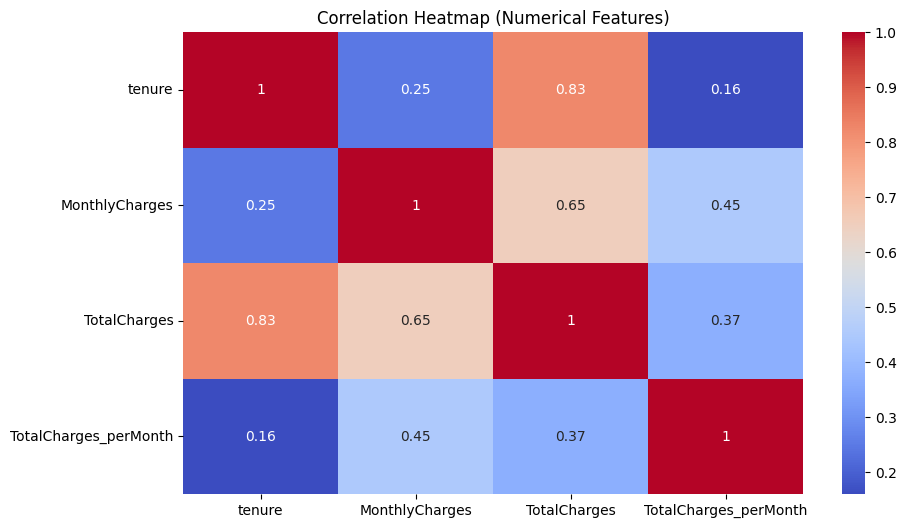

In [14]:
# correlational analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

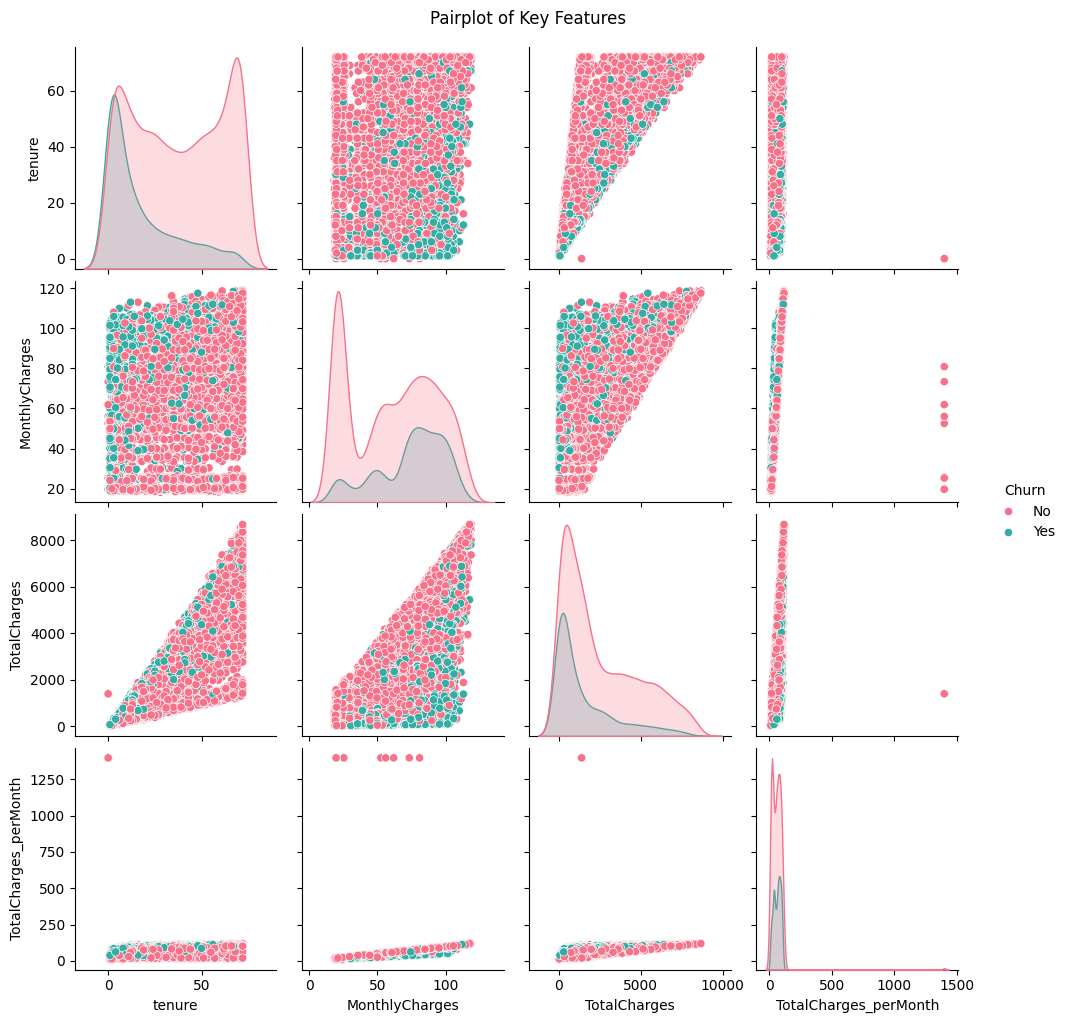

In [15]:
# pairplot 
sns.pairplot(df[["tenure", "MonthlyCharges", "TotalCharges", "TotalCharges_perMonth", "Churn"]],
             hue="Churn", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11712\2237444639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")


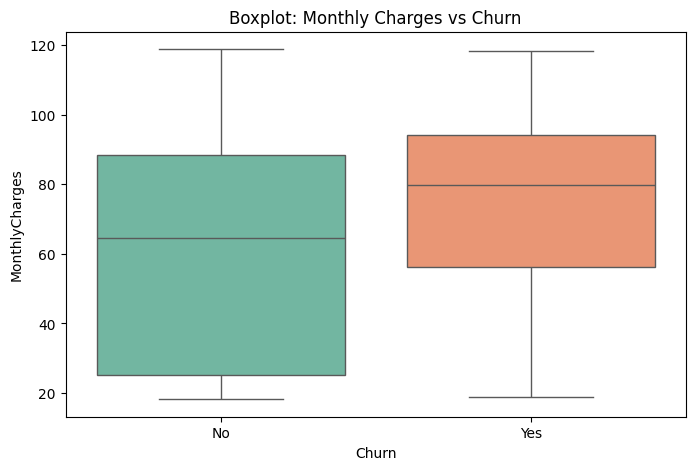

C:\Users\Admin\AppData\Local\Temp\ipykernel_11712\2237444639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df, palette="cool")


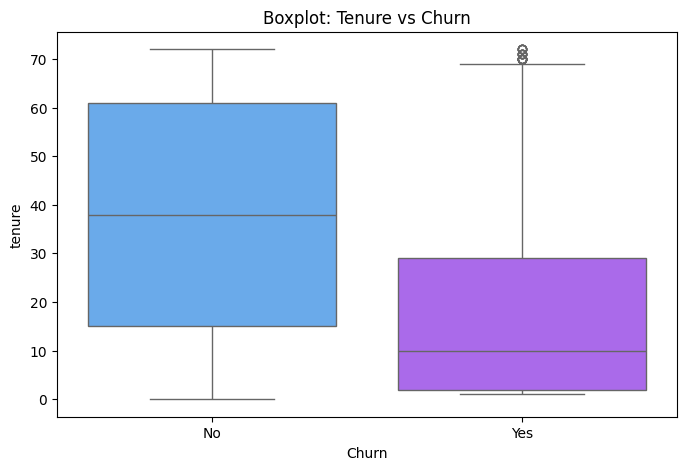

In [17]:
# boxplot 
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Boxplot: Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df, palette="cool")
plt.title("Boxplot: Tenure vs Churn")
plt.show()


In [18]:
# encode categroical columns 
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [19]:
# feature scaling
scaler = StandardScaler()
scaled_cols = ["tenure", "MonthlyCharges", "TotalCharges", "TotalCharges_perMonth"]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [20]:
# train_test_split 
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# model tarning random forest 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# evultion
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))



📊 Confusion Matrix:
 [[936 100]
 [185 188]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


🎯 Accuracy: 0.7977288857345636


C:\Users\Admin\AppData\Local\Temp\ipykernel_11712\2784864368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")


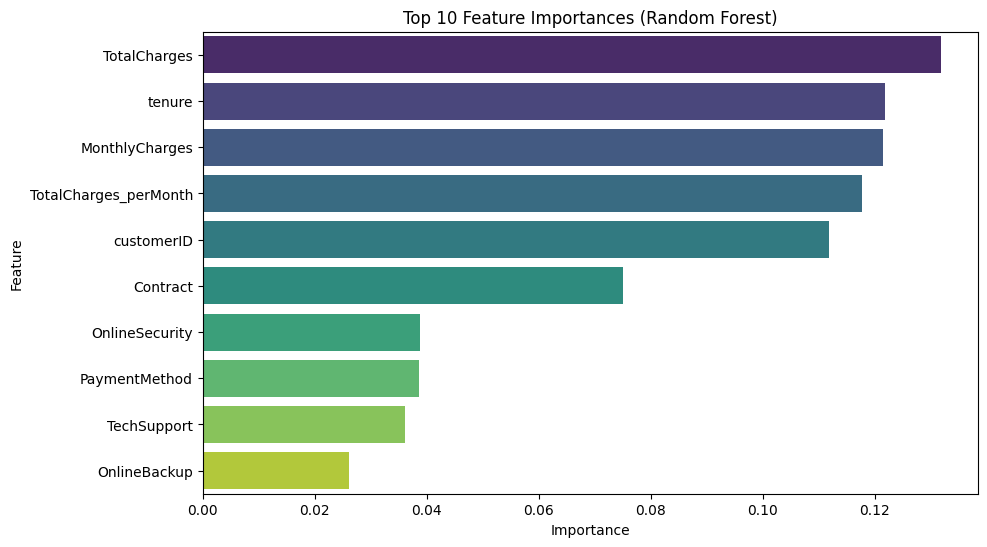

In [23]:
# feature importance visuvalzion
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()